In [172]:
import tensorflow as tf
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

In [174]:
fldr="C:/Users/kalpa/Desktop/AGE"

In [176]:
files=os.listdir(fldr)

In [22]:
files

['crop_part1', 'UTKFace']

In [182]:
import os
import cv2

ages = []
genders = []
images = []

for root, dirs, files in os.walk(fldr):
    for file in files:
        # Skip files that do not match the expected pattern
        if not file.startswith(('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')):
            print(f"Skipping file {file} (does not start with a digit)")
            continue
        
        try:
            age = int(file.split('_')[0])
            gender = int(file.split('_')[1])
            total = os.path.join(root, file)  # Use os.path.join to handle paths

            print(f"Reading image from: {total}")
            image = cv2.imread(total)
            
            if image is None:
                print(f"Skipping file {file} (image could not be loaded)")
                continue

            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (48, 48))
            images.append(image)
            ages.append(age)
            genders.append(gender)

            print(f"Added image, age: {age}, gender: {gender}")

        except ValueError as e:
            print(f"Skipping file {file} due to error: {e}")

print(f"Total images processed: {len(images)}")
print(f"Total ages processed: {len(ages)}")
print(f"Total genders processed: {len(genders)}")


Reading image from: C:/Users/kalpa/Desktop/AGE\crop_part1\100_1_0_20170110183726390.jpg.chip.jpg
Added image, age: 100, gender: 1
Reading image from: C:/Users/kalpa/Desktop/AGE\crop_part1\100_1_2_20170105174847679.jpg.chip.jpg
Added image, age: 100, gender: 1
Reading image from: C:/Users/kalpa/Desktop/AGE\crop_part1\101_1_2_20170105174739309.jpg.chip.jpg
Added image, age: 101, gender: 1
Reading image from: C:/Users/kalpa/Desktop/AGE\crop_part1\10_0_0_20161220222308131.jpg.chip.jpg
Added image, age: 10, gender: 0
Reading image from: C:/Users/kalpa/Desktop/AGE\crop_part1\10_0_0_20170103200329407.jpg.chip.jpg
Added image, age: 10, gender: 0
Reading image from: C:/Users/kalpa/Desktop/AGE\crop_part1\10_0_0_20170103200522151.jpg.chip.jpg
Added image, age: 10, gender: 0
Reading image from: C:/Users/kalpa/Desktop/AGE\crop_part1\10_0_0_20170103233459275.jpg.chip.jpg
Added image, age: 10, gender: 0
Reading image from: C:/Users/kalpa/Desktop/AGE\crop_part1\10_0_0_20170104013211746.jpg.chip.jpg
Ad

In [185]:
len(images)

33488

In [188]:
len(ages)

33488

In [190]:
images = np.array(images)
ages = np.array(ages)
genders = np.array(genders)

print(f"Total images: {len(images)}")
print(f"Total ages: {len(ages)}")
print(f"Total genders: {len(genders)}")

Total images: 33488
Total ages: 33488
Total genders: 33488


In [192]:
valid_indices = np.where((genders == 0) | (genders == 1))[0]

In [194]:
images_f = images[valid_indices]
ages_f = ages[valid_indices]
genders_f = genders[valid_indices]

In [196]:
print(f"Filtered Total images: {images_f.shape}")
print(f"Filtered Total ages: {ages_f.shape}")
print(f"Filtered Total genders: {genders_f.shape}")

# Check the distribution of gender labels
values, counts = np.unique(genders_f, return_counts=True)
print(f"Gender labels: {values}")
print(f"Counts: {counts}")

Filtered Total images: (33487, 48, 48, 3)
Filtered Total ages: (33487,)
Filtered Total genders: (33487,)
Gender labels: [0 1]
Counts: [16763 16724]


In [198]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# One-hot encode gender labels (assuming binary classification)
genders_f = to_categorical(genders_f, num_classes=2)


In [200]:
X_train, X_test, age_train, age_test, gender_train, gender_test = train_test_split(
    images_f, ages_f, genders_f, test_size=0.2, random_state=42
)

In [202]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"gender_train shape: {gender_train.shape}")
print(f"gender_test shape: {gender_test.shape}")

X_train shape: (26789, 48, 48, 3)
X_test shape: (6698, 48, 48, 3)
gender_train shape: (26789, 2)
gender_test shape: (6698, 2)


In [208]:
#just gender
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) 

C:\Users\kalpa\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [264]:
from tensorflow.keras.models import save_model

# Save the entire model
model.save('C:/Users/kalpa/Desktop/AGE/age_gender.h5')


In [268]:
# Save model weights
model.save_weights('C:/Users/kalpa/Desktop/AGE/age_gender.weights.h5')


In [272]:
# Save model architecture to JSON
model_json = model.to_json()
with open('C:/Users/kalpa/Desktop/AGE/age_gender_architecture.json', 'w') as json_file:
    json_file.write(model_json)


In [210]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 838,978 (3.20 MB)

 Trainable params: 838,978 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [212]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [214]:
model.fit(X_train, gender_train, epochs=10, validation_data=(X_test, gender_test))

Epoch 1/10
838/838 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.6807 - loss: 7.9259 - val_accuracy: 0.8064 - val_loss: 0.4107
Epoch 2/10
838/838 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.7899 - loss: 0.4343 - val_accuracy: 0.8291 - val_loss: 0.3735
Epoch 3/10
838/838 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.8196 - loss: 0.3857 - val_accuracy: 0.8461 - val_loss: 0.3343
Epoch 4/10
838/838 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.8385 - loss: 0.3536 - val_accuracy: 0.8520 - val_loss: 0.3277
Epoch 5/10
838/838 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.8467 - loss: 0.3353 - val_accuracy: 0.8579 - val_loss: 0.3155
Epoch 6/10
838/838 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.8473 - loss: 0.3280 - val_accuracy: 0.8649 - val_loss: 0.3076
Epoch 7/10
838/838 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.8600 - loss: 0.3082 - val_accuracy: 0.8656 - val_loss: 0.3069
Epoch 8/10
838/838 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.8609 - loss: 0.3021 - 

In [216]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, gender_test)

# Print the accuracy
print(f'Test accuracy: {accuracy * 100:.2f}%')


210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8525 - loss: 0.3464
Test accuracy: 85.89%


In [218]:
#both age and gender
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(48, 48, 3))

# Shared convolutional base
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

# Output layer for gender prediction (binary classification)
gender_output = Dense(2, activation='softmax', name='gender_output')(x)

# Output layer for age prediction (regression)
age_output = Dense(1, activation='linear', name='age_output')(x)

# Create the model
model = Model(inputs=input_layer, outputs=[gender_output, age_output])

# Compile the model
model.compile(optimizer='adam', 
              loss={'gender_output': 'categorical_crossentropy', 'age_output': 'mse'},
              metrics={'gender_output': 'accuracy', 'age_output': 'mae'})

# Summary of the model
model.summary()


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 46, 46,    │        896 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 23, 23,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 21, 21,    │     18,496 │ max_pooling2d_2[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 10, 10,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 6400)      │          0 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │    819,328 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gender_output       │ (None, 2)         │        258 │ dropout_1[0][0]   │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ age_output (Dense)  │ (None, 1)         │        129 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 839,107 (3.20 MB)

 Trainable params: 839,107 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [254]:
# Train the model
history = model.fit(X_train, 
                    {'gender_output': gender_train, 'age_output': age_train}, 
                    epochs=50, 
                    validation_data=(X_test, {'gender_output': gender_test, 'age_output': age_test}))


Epoch 1/50
838/838 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - age_output_mae: 9.1993 - gender_output_accuracy: 0.5551 - loss: 157.1464 - val_age_output_mae: 8.9099 - val_gender_output_accuracy: 0.5396 - val_loss: 142.4017
Epoch 2/50
838/838 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - age_output_mae: 8.8869 - gender_output_accuracy: 0.5489 - loss: 148.2525 - val_age_output_mae: 8.5881 - val_gender_output_accuracy: 0.5405 - val_loss: 146.7718
Epoch 3/50
838/838 ━━━━━━━━━━━━━━━━━━━━ 31s 37ms/step - age_output_mae: 8.9581 - gender_output_accuracy: 0.5529 - loss: 150.3424 - val_age_output_mae: 8.0670 - val_gender_output_accuracy: 0.5118 - val_loss: 130.0040
Epoch 4/50
838/838 ━━━━━━━━━━━━━━━━━━━━ 31s 37ms/step - age_output_mae: 8.7601 - gender_output_accuracy: 0.5676 - loss: 142.8029 - val_age_output_mae: 8.2023 - val_gender_output_accuracy: 0.5302 - val_loss: 123.8914
Epoch 5/50
838/838 ━━━━━━━━━━━━━━━━━━━━ 31s 37ms/step - age_output_mae: 8.3712 - gender_output_accuracy: 0.5564 - loss: 130.0895 - val_a

In [295]:
from tensorflow.keras.models import save_model

# Save the entire model
model.save('C:/Users/kalpa/Desktop/AGE/age_gender.h5')

In [297]:
# Save model weights
model.save_weights('C:/Users/kalpa/Desktop/AGE/age_gender.weights.h5')

In [299]:
# Save model architecture to JSON
model_json = model.to_json()
with open('C:/Users/kalpa/Desktop/AGE/age_gender_architecture.json', 'w') as json_file:
    json_file.write(model_json)

In [256]:
# Predict both gender and age
predictions = model.predict(X_test)

# Gender predictions
gender_predictions = np.argmax(predictions[0], axis=1)

# Age predictions
age_predictions = predictions[1]

# Example output
print(f"Predicted Gender: {gender_predictions[0]} (0: Male, 1: Female)")
print(f"Predicted Age: {age_predictions[0]}")


210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Predicted Gender: 0 (0: Male, 1: Female)
Predicted Age: [26.461342]


In [258]:


results = model.evaluate(X_test, {'gender_output': gender_test, 'age_output': age_test})
print(results)


210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - age_output_mae: 7.4323 - gender_output_accuracy: 0.6308 - loss: 104.4186
[108.38227081298828, 7.528458118438721, 0.6318303942680359]


In [260]:
# Extract and print gender accuracy
gender_accuracy = results[2]  # Assuming results[2] corresponds to gender accuracy based on your output
print(f"Test Gender Accuracy: {gender_accuracy * 100:.2f}%")

Test Gender Accuracy: 63.18%


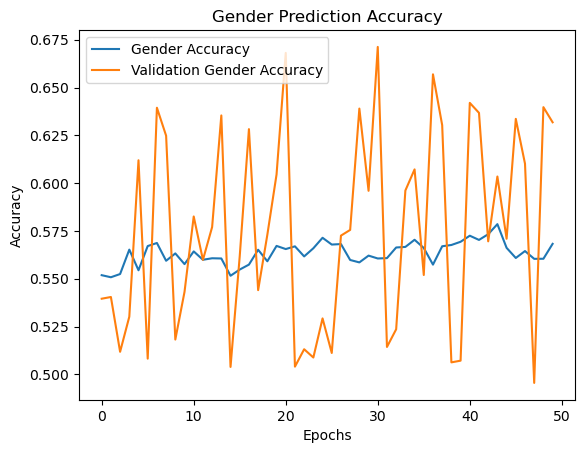

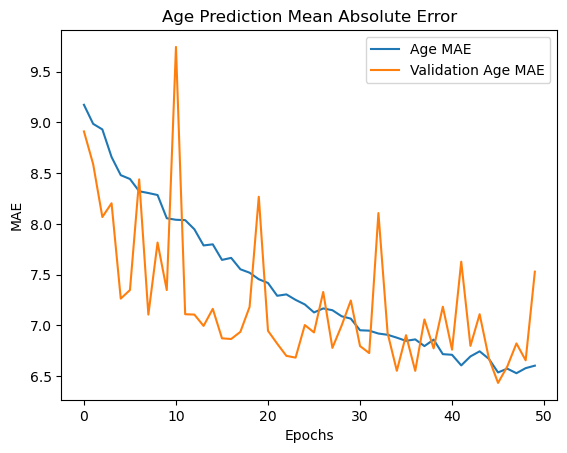

In [262]:
import matplotlib.pyplot as plt

# Assuming 'history' is the variable storing the training history
# Plot gender accuracy
plt.plot(history.history['gender_output_accuracy'], label='Gender Accuracy')
plt.plot(history.history['val_gender_output_accuracy'], label='Validation Gender Accuracy')
plt.title('Gender Prediction Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot age MAE
plt.plot(history.history['age_output_mae'], label='Age MAE')
plt.plot(history.history['val_age_output_mae'], label='Validation Age MAE')
plt.title('Age Prediction Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Test Age Mean Absolute Error (MAE): 8.13
Test Age Mean Squared Error (MSE): 131.91
Test Age R-squared (R²): 0.72


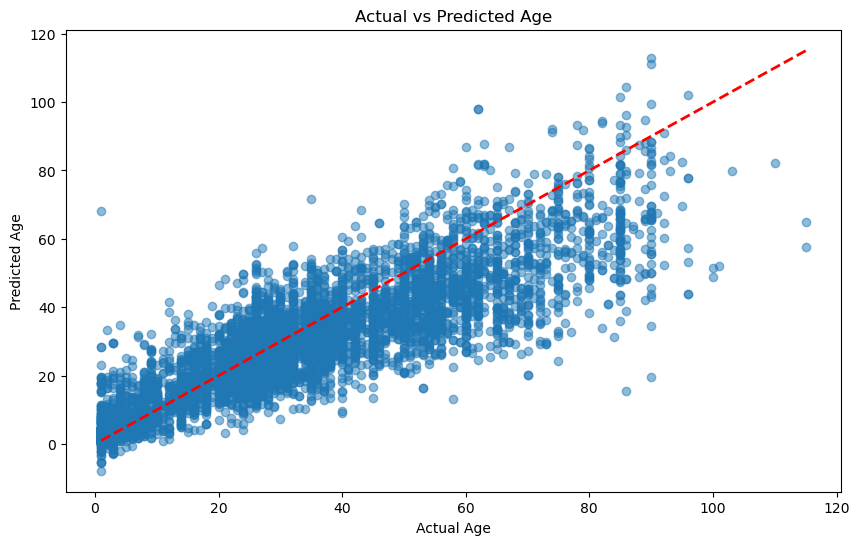

In [252]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Predict age on the test set
age_predictions = model.predict(X_test)
age_predictions = age_predictions[1]  # Assuming the second output is age

# Calculate performance metrics
mae = mean_absolute_error(age_test, age_predictions)
mse = mean_squared_error(age_test, age_predictions)
r2 = r2_score(age_test, age_predictions)

print(f"Test Age Mean Absolute Error (MAE): {mae:.2f}")
print(f"Test Age Mean Squared Error (MSE): {mse:.2f}")
print(f"Test Age R-squared (R²): {r2:.2f}")

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(age_test, age_predictions, alpha=0.5)
plt.plot([min(age_test), max(age_test)], [min(age_test), max(age_test)], 'r--', lw=2)  # Line of equality
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs Predicted Age')
plt.show()


In [287]:
#testing
import cv2
import numpy as np

def preprocess_image(image_path, target_size=(48, 48)):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image could not be loaded.")
    
    # Convert color from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Resize the image to the target size
    image = cv2.resize(image, target_size)
    
    # Normalize the image
    image = image / 255.0  # Assuming the model was trained with normalized images
    
    # Expand dimensions to match model input (batch size of 1)
    image = np.expand_dims(image, axis=0)
    
    return image


In [289]:
def predict_age_and_gender(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    
    # Make predictions
    predictions = model.predict(preprocessed_image)
    
    # Extract predictions for age and gender
    age_prediction = predictions[1][0]  # Adjust index based on model output
    gender_prediction = np.argmax(predictions[0], axis=-1)[0]  # Assuming gender is one-hot encoded
    
    return age_prediction, gender_prediction


In [334]:
# Path to the test image
image_path = 'myphoto.jpg'

# Predict age and gender
age, gender = predict_age_and_gender(image_path)
print(f"Predicted Age: {age:}")
print(f"Predicted Gender: {'Female' if gender == 1 else 'Male'}")
if age>13 and age<60:
    print("The person is allowed and WELCOME")
else:
    print("The person is not allowed into the theatre")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Age: [20.643467]
Predicted Gender: Female
The person is allowed and WELCOME
